In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [15]:

files  = [file for file in os.listdir('./air_quality_data')]

all_stations_data = pd.DataFrame()

for file in files:                                              #Combining multiple csv files into one dataframe
    df = pd.read_csv('./air_quality_data/'+file)                
    all_stations_data = pd.concat([all_stations_data,df])
    
all_stations_data.to_csv('all_data.csv',index = False)

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [13]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [15]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

# Data Cleaning

In [3]:
df.dropna(inplace = True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [74]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'date_time'],
      dtype='object')

In [4]:
#Won't be evaluating these parameters for this project
df = df.drop(columns = ['No','TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'])

In [23]:

df['date_time'] = df['month'].map(str) + '-' + df['year'].map(str)
df['date_time'] = pd.to_datetime(df['date_time'], format= '%m-%Y').dt.strftime('%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       382168 non-null  int64  
 1   month      382168 non-null  int64  
 2   day        382168 non-null  int64  
 3   hour       382168 non-null  int64  
 4   PM2.5      382168 non-null  float64
 5   PM10       382168 non-null  float64
 6   SO2        382168 non-null  float64
 7   NO2        382168 non-null  float64
 8   CO         382168 non-null  float64
 9   O3         382168 non-null  float64
 10  station    382168 non-null  object 
 11  date_time  382168 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 37.9+ MB


In [94]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station,date_time
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03
...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong,2017-02
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong,2017-02
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong,2017-02
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong,2017-02


In [80]:
df.isnull().sum()

year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
station      0
date_time    0
dtype: int64

## EDA


In [5]:
#Highest recorded vs Lowest recorded PM

print(df['PM2.5'].max(),',',df['PM2.5'].min())   #For PM2.5
print(df['PM10'].max(),',',df['PM10'].min())     #For PM10

844.0 , 2.0
999.0 , 2.0


In [6]:
#Which year had the highest polluted month in Beijing each year.  (based on PM2.5 & PM10)

In [21]:
df_pm = df.groupby(['year','month'])[['PM2.5']].mean(numeric_only = True)
df_pm.reset_index().sort_values(by = 'PM2.5', ascending = False).head(5)

,year,month,PM2.5
33,2015,12,146.333570
11,2014,2,145.701441
45,2016,12,129.280047
19,2014,10,118.961732
32,2015,11,114.732490


In [22]:
df_pm = df.groupby(['year','month'])[['PM10']].mean(numeric_only = True)
df_pm.reset_index().sort_values(by = 'PM10', ascending = False).head(5)

,year,month,PM10
33,2015,12,156.083215
45,2016,12,150.366530
11,2014,2,149.545354
19,2014,10,146.182373
24,2015,3,144.310827


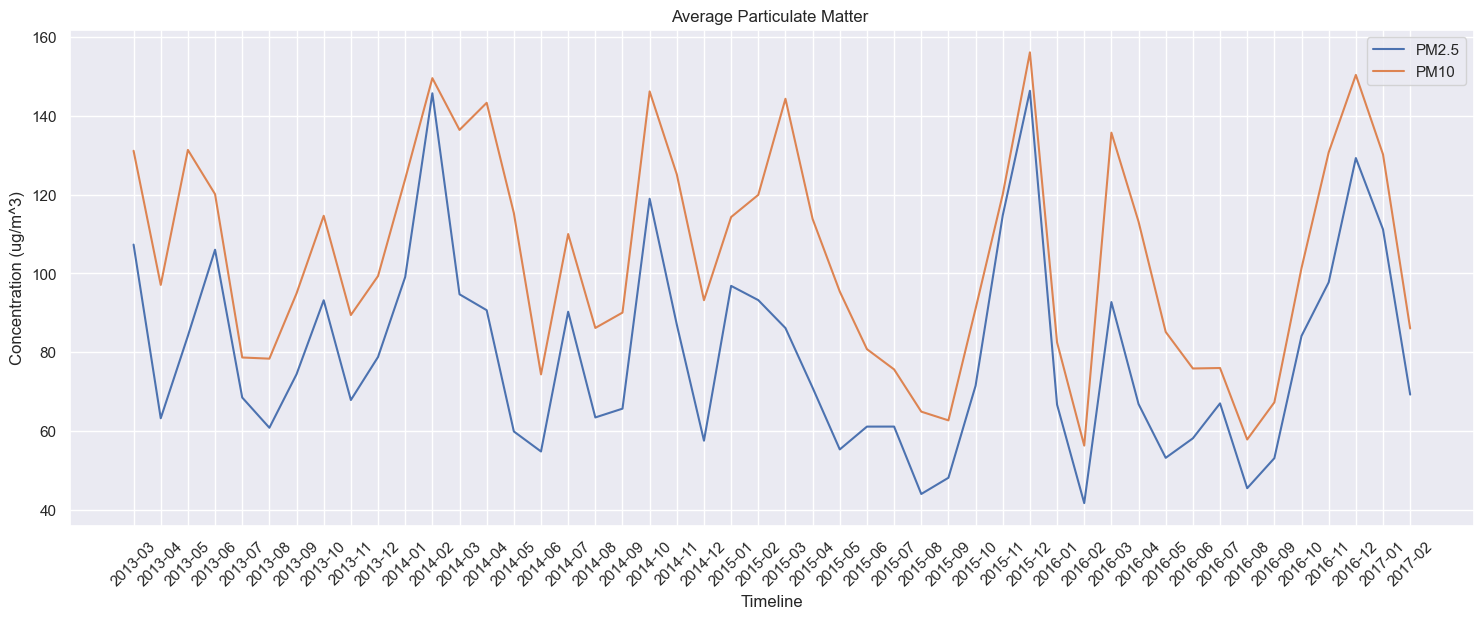

In [73]:
#Plotting both Particulate Matter per Year

ax = pm.plot( x= 'date_time', y=['PM2.5', 'PM10'],figsize=(15,6),grid = True )
ax.set_title('Average Particulate Matter ')

ax.set_ylabel('Concentration (ug/m^3)')
ax.set_xlabel('Timeline')

plt.tight_layout()
plt.xticks(pm.index, pm['date_time'] , rotation = 45)
plt.show()

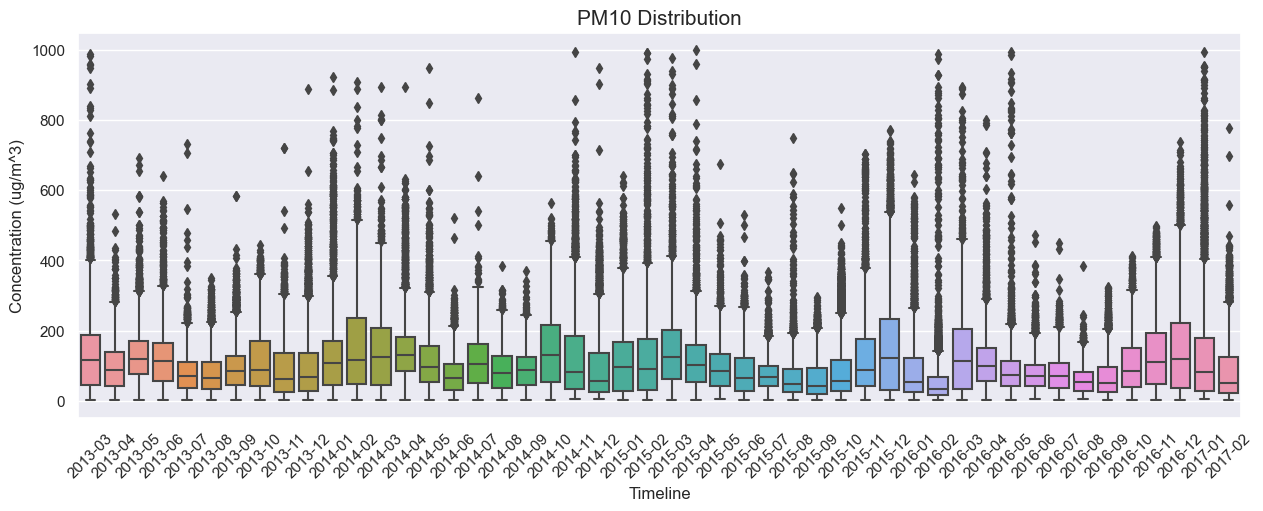

In [37]:
#Ploting distribution of PM10 pollutants
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.boxplot(data = df, x = 'date_time', y= 'PM10')

ax.set_xlabel('Timeline')
ax.set_ylabel('Concentration (ug/m^3)')
ax.set_title('PM10 Distribution', fontsize = 15)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45)
plt.show()

In [9]:
#Exploring whether there is fluctuations in pollutant levels based on hour
compounds = df.groupby('hour')[['SO2', 'NO2', 'CO','O3']].mean()
compounds.describe()

,SO2,NO2,CO,O3
count,24.000000,24.000000,24.000000,24.000000
mean,15.628304,50.525467,1229.434962,57.280146
std,2.148328,6.898676,120.510891,27.204223
min,12.498735,38.480583,1003.156315,25.313186
25%,14.512919,45.957235,1142.860961,33.835672
50%,15.192881,51.913409,1267.634598,48.116600
75%,17.199173,54.675969,1327.687338,80.815937
max,19.492679,60.422450,1370.856442,102.562545


In [10]:
#Lets explore the large std of O3 relative to its mean
compounds = compounds.reset_index()


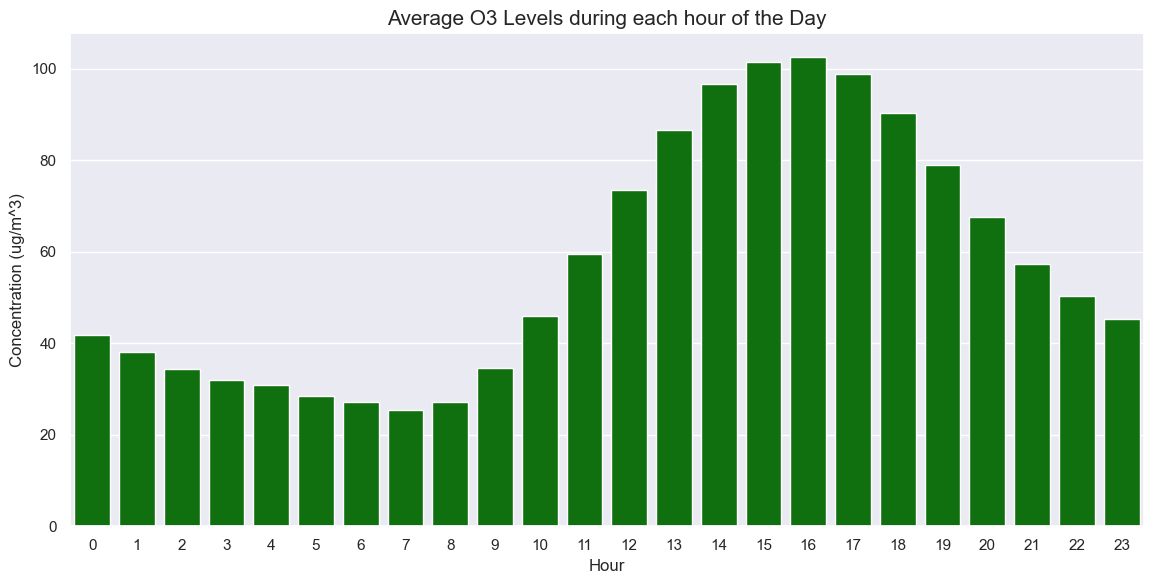

In [11]:
sns.set(rc={'figure.figsize':(11.7,6)})

ax = sns.barplot(x = 'hour', y='O3', data = compounds, color = 'green')

ax.set_xlabel('Hour')
ax.set_ylabel('Concentration (ug/m^3)')
ax.set_title('Average O3 Levels during each hour of the Day', fontsize = 15)

#ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)
#ax.bar_label(ax.containers[0],fontsize = 7)

plt.tight_layout()
plt.show()

In [12]:
#Observing the stations with the highest average levels of carbon monoxide
df.groupby('station')['CO'].mean().sort_values(ascending = False)

station
Wanshouxigong    1362.531647
Nongzhanguan     1327.784381
Gucheng          1325.509691
Dongsi           1316.524392
Tiantan          1297.434187
Wanliu           1293.450153
Guanyuan         1265.709760
Aotizhongxin     1256.574729
Shunyi           1201.778267
Changping        1151.716441
Huairou          1032.398291
Dingling          916.547211
Name: CO, dtype: float64

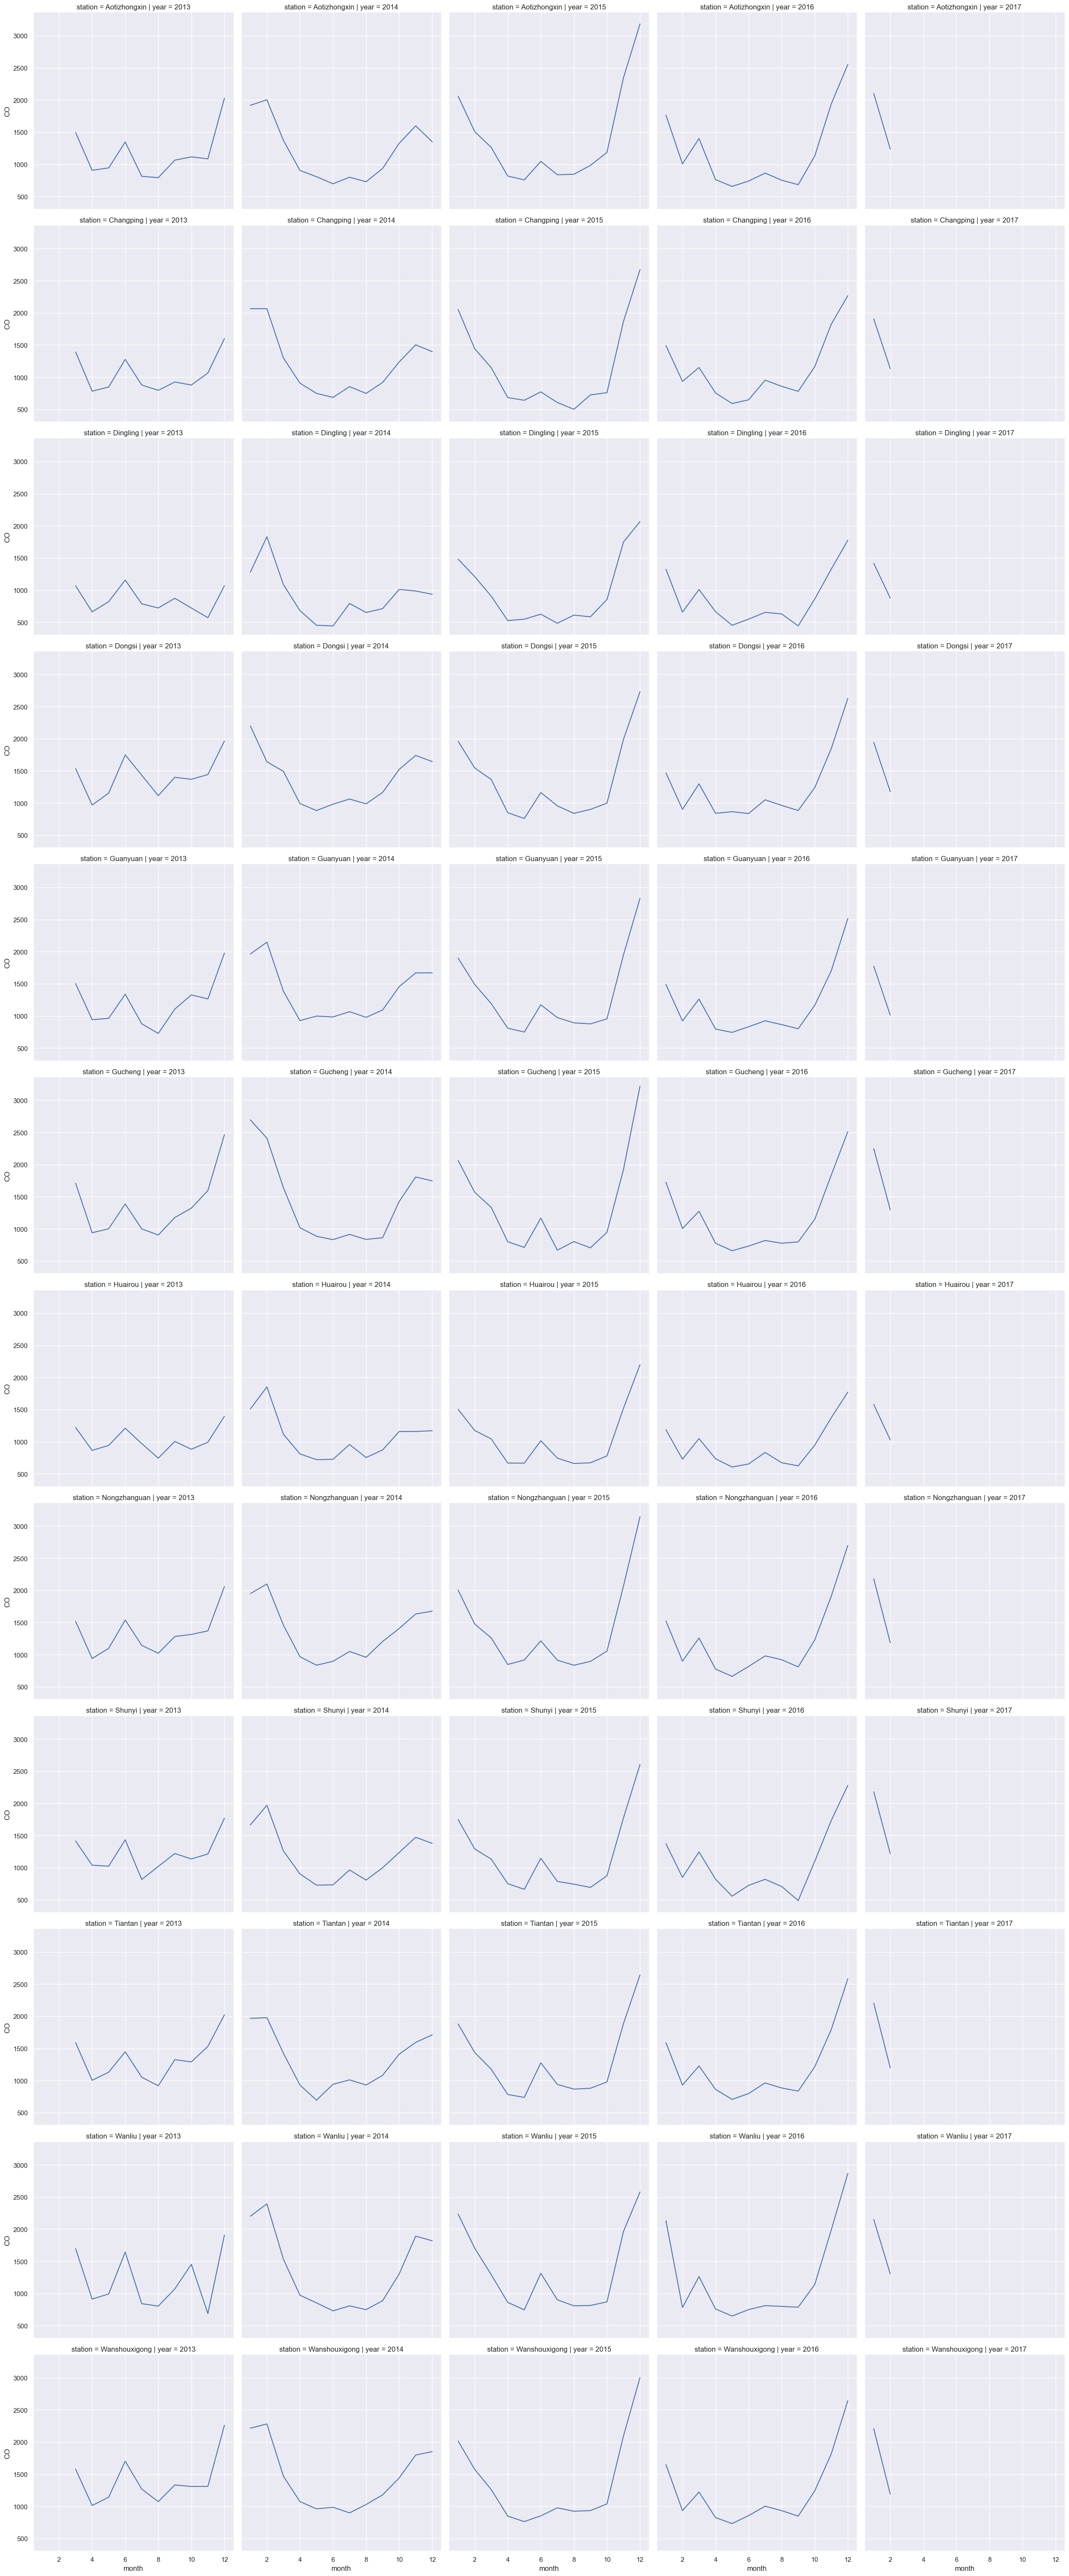

In [72]:
#Ploting carbon monoxide levels throughout each year at each station

CO = df.groupby(['year','month','station'])['CO'].mean().reset_index()
sns.relplot(x='month', y='CO', kind = 'line',col='year'  ,data = CO, row = 'station')

In [48]:
df2 = df.copy()


In [50]:
#Creating new columns to rate air quality
df2

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station,date_time
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03
...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong,2017-02
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong,2017-02
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong,2017-02
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong,2017-02


In [54]:
#Creating new column to rate air quality 
df2.loc[df2['PM2.5']<=7,'PM2.5 (Rating)'] = 'Excellent'

df2.loc[df2['PM2.5'].between(8,15),'PM2.5 (Rating)'] = 'Fine'

df2.loc[df2['PM2.5'].between(16,30),'PM2.5 (Rating)'] = 'Moderate'

df2.loc[df2['PM2.5'].between(31,55),'PM2.5 (Rating)'] = 'Poor'

df2.loc[df2['PM2.5'].between(56,110),'PM2.5 (Rating)'] = 'Very Poor'

df2.loc[df2['PM2.5']>110,'PM2.5 (Rating)'] = 'Severe'

In [70]:
#Excluding the year 2017 as we only have the first few months of data
df2 = df2[df2['year'] != 2017]

<Axes: xlabel='PM2.5 (Rating)', ylabel='count'>

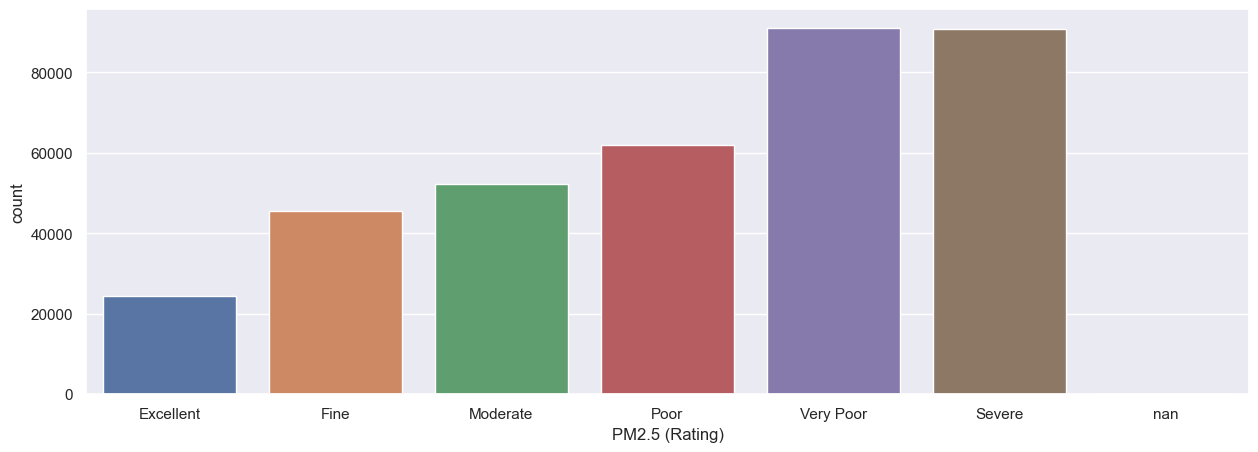

In [71]:
sns.countplot(x = 'PM2.5 (Rating)', data = df2)